# User Profiling and Segmentation

- User ID: Unique identifier for each user.
- Age: Age range of the user.
- Gender: Gender of the user.
- Location: User’s location type (Urban, Suburban, Rural).
- Language: Primary language of the user.
- Education Level: Highest education level achieved.
- Likes and Reactions: Number of likes and reactions a user has made.
- Followed Accounts: Number of accounts a user follows.
- Device Usage: Primary device used for accessing the platform (Mobile, Desktop, Tablet).
- Time Spent Online (hrs/weekday): Average hours spent online on weekdays.
- Time Spent Online (hrs/weekend): Average hours spent online on weekends.
- Click-Through Rates (CTR): The percentage of ad impressions that lead to clicks.
- Conversion Rates: The percentage of clicks that lead to conversions/actions.
- Ad Interaction Time (sec): Average time spent interacting with ads in seconds.
- Income Level: User’s income level.
- Top Interests: Primary interests of the user.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('user_profiles_for_ads.csv')

In [7]:
df.head()

,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests
0,1,25-34,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,20k-40k,Digital Marketing
1,2,65+,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,0-20k,Data Science
2,3,45-54,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,60k-80k,Fitness and Wellness
3,4,35-44,Female,Rural,Spanish,PhD,9182,152,Desktop Only,3.1,4.2,0.093,0.061,65,100k+,"Gaming, DIY Crafts"
4,5,25-34,Female,Urban,English,Technical,6848,371,Mobile Only,2.0,3.8,0.175,0.022,99,20k-40k,"Fitness and Wellness, Investing and Finance, G..."


In [14]:
df.isnull().sum() # no missing values

User ID                            0
Age                                0
Gender                             0
Location                           0
Language                           0
Education Level                    0
Likes and Reactions                0
Followed Accounts                  0
Device Usage                       0
Time Spent Online (hrs/weekday)    0
Time Spent Online (hrs/weekend)    0
Click-Through Rates (CTR)          0
Conversion Rates                   0
Ad Interaction Time (sec)          0
Income Level                       0
Top Interests                      0
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   User ID                          1000 non-null   int64  
 1   Age                              1000 non-null   object 
 2   Gender                           1000 non-null   object 
 3   Location                         1000 non-null   object 
 4   Language                         1000 non-null   object 
 5   Education Level                  1000 non-null   object 
 6   Likes and Reactions              1000 non-null   int64  
 7   Followed Accounts                1000 non-null   int64  
 8   Device Usage                     1000 non-null   object 
 9   Time Spent Online (hrs/weekday)  1000 non-null   float64
 10  Time Spent Online (hrs/weekend)  1000 non-null   float64
 11  Click-Through Rates (CTR)        1000 non-null   float64
 12  Conversion Rates     

## EDA (Exploratory Data Analysis)

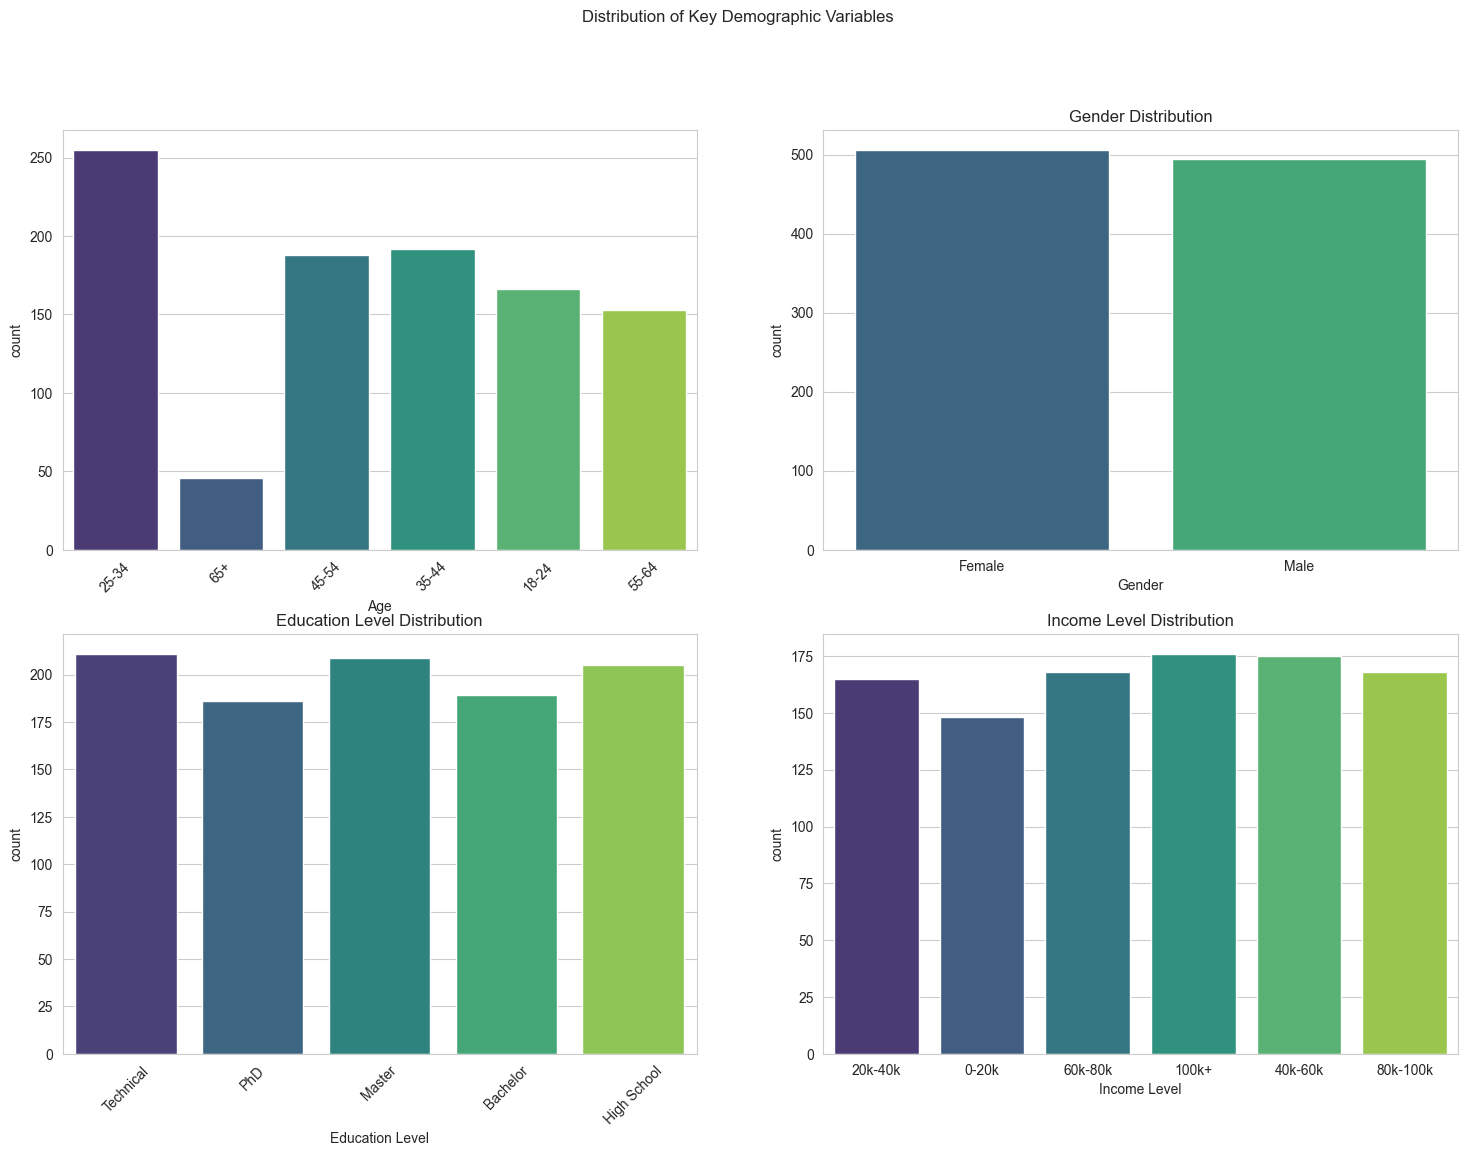

In [43]:
# setting the aesthetic style of the plots
sns.set_style('whitegrid')

# creating subplots for the demographic distributions
fig,axes=plt.subplots(2,2,figsize=(18,12))
fig.suptitle('Distribution of Key Demographic Variables')

# age distribution
sns.countplot(ax=axes[0,0],x='Age',data=df,palette='viridis')
axes[0,0].tick_params(axis='x',rotation=45)

# gender distribution
sns.countplot(ax=axes[0,1],x='Gender',data=df,palette='viridis')
axes[0,1].set_title('Gender Distribution')

# education level distribution
sns.countplot(ax=axes[1,0],x='Education Level',data=df,palette='viridis')
axes[1,0].set_title('Education Level Distribution')
axes[1,0].tick_params(axis='x',rotation=45)

# income level distribution
sns.countplot(ax=axes[1,1],x='Income Level',data=df,palette='viridis')
axes[1,1].set_title('Income Level Distribution')
axes[1,0].tick_params(axis='x',rotation=45)

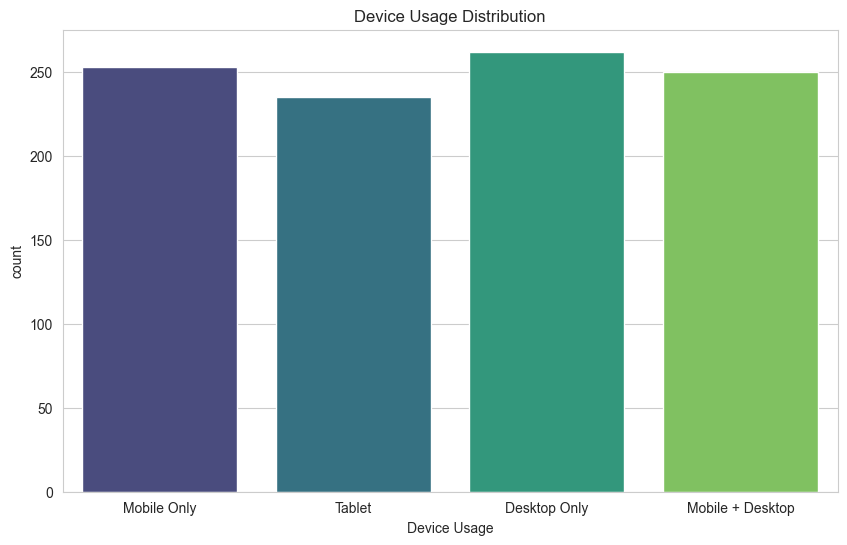

In [55]:
# device usage distribution
plt.figure(figsize=(10,6))
sns.countplot(x='Device Usage',data=df,palette='viridis')
plt.title('Device Usage Distribution');

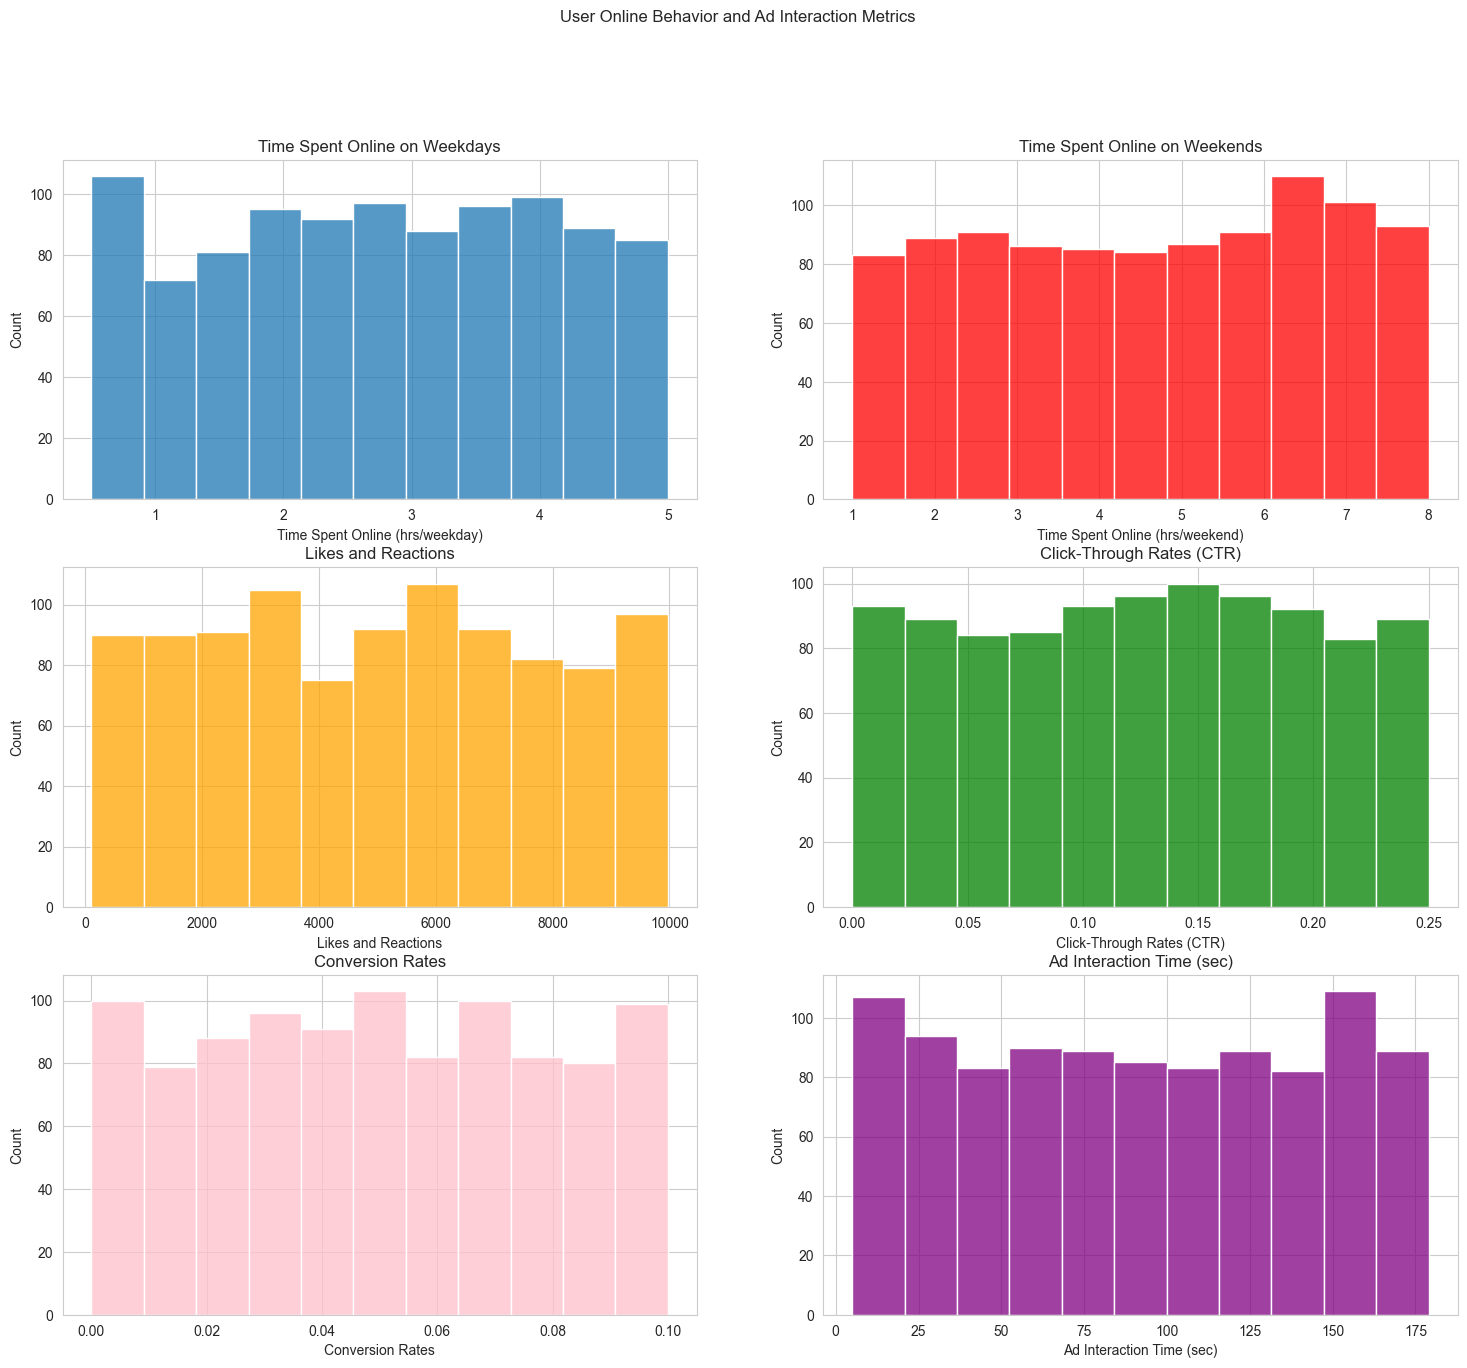

In [95]:
# creating subplots for user online behavior and ad interaction metrics
fig,axes=plt.subplots(3,2,figsize=(18,15))
fig.suptitle('User Online Behavior and Ad Interaction Metrics')

# time spent online on weekdays
sns.histplot(ax=axes[0,0],x='Time Spent Online (hrs/weekday)',data=df)
axes[0,0].set_title('Time Spent Online on Weekdays')

# time spent online on weekends
sns.histplot(ax=axes[0,1],x='Time Spent Online (hrs/weekend)',data=df,color='red')
axes[0,1].set_title('Time Spent Online on Weekends')

# likes and reactions
sns.histplot(ax=axes[1,0],x='Likes and Reactions',data=df,color='orange')
axes[1,0].set_title('Likes and Reactions')

# click-through rates
sns.histplot(ax=axes[1,1],x='Click-Through Rates (CTR)',data=df,color='green')
axes[1,1].set_title('Click-Through Rates (CTR)')

# conversion rates
sns.histplot(ax=axes[2,0],x='Conversion Rates',data=df,color='pink')
axes[2,0].set_title('Conversion Rates')

# ad interaction time
sns.histplot(ax=axes[2,1],x='Ad Interaction Time (sec)',data=df,color='purple')
axes[2,1].set_title('Ad Interaction Time (sec)');

Now, let’s identify the most common interests among users, which is vital for segmenting the audience and tailoring ad campaigns to match user preferences:

In [57]:
df.head()

,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests
0,1,25-34,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,20k-40k,Digital Marketing
1,2,65+,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,0-20k,Data Science
2,3,45-54,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,60k-80k,Fitness and Wellness
3,4,35-44,Female,Rural,Spanish,PhD,9182,152,Desktop Only,3.1,4.2,0.093,0.061,65,100k+,"Gaming, DIY Crafts"
4,5,25-34,Female,Urban,English,Technical,6848,371,Mobile Only,2.0,3.8,0.175,0.022,99,20k-40k,"Fitness and Wellness, Investing and Finance, G..."


In [98]:
from collections import Counter

In [108]:
# splittinf the 'Top Interest' column and creating a list of all interest
interest_list=df['Top Interests'].str.split(',').sum()
interest_list

['Digital Marketing',
 'Data Science',
 'Fitness and Wellness',
 'Gaming',
 ' DIY Crafts',
 'Fitness and Wellness',
 ' Investing and Finance',
 ' Gardening',
 ' Music Production',
 'Gourmet Cooking',
 ' Software Engineering',
 ' Eco-Friendly Living',
 'Gardening',
 ' Digital Marketing',
 ' Music Production',
 'Music Production',
 ' Photography',
 ' Gaming',
 ' Travel and Adventure',
 'Eco-Friendly Living',
 ' Gardening',
 'Digital Marketing',
 ' Travel and Adventure',
 'Eco-Friendly Living',
 ' DIY Crafts',
 ' Travel and Adventure',
 ' Software Engineering',
 'Software Engineering',
 ' DIY Crafts',
 'Software Engineering',
 ' Eco-Friendly Living',
 ' Gardening',
 ' Photography',
 'Gourmet Cooking',
 ' Travel and Adventure',
 'Software Engineering',
 ' Digital Marketing',
 'Fashion Modelling',
 ' Photography',
 ' Digital Marketing',
 'Eco-Friendly Living',
 ' Software Engineering',
 ' Fitness and Wellness',
 'Gourmet Cooking',
 ' Investing and Finance',
 ' Reading and Literature',
 'Fit

In [116]:
# counting the frequency of each interest
interest_counter=Counter(interest_list)
interest_counter

Counter({' Eco-Friendly Living': 109,
         ' Digital Marketing': 105,
         ' Fashion Modelling': 103,
         ' Music Production': 102,
         ' Photography': 102,
         ' Fitness and Wellness': 99,
         ' Investing and Finance': 96,
         ' Gaming': 95,
         ' Travel and Adventure': 92,
         ' Software Engineering': 91,
         ' Reading and Literature': 91,
         ' Data Science': 90,
         ' Gourmet Cooking': 89,
         ' DIY Crafts': 88,
         ' Pet Care': 88,
         ' Gardening': 82,
         'Digital Marketing': 77,
         'Investing and Finance': 75,
         'Fitness and Wellness': 68,
         'Gourmet Cooking': 68,
         'Music Production': 67,
         'Pet Care': 67,
         'Reading and Literature': 65,
         'Gaming': 60,
         'Software Engineering': 60,
         'Travel and Adventure': 60,
         'DIY Crafts': 60,
         'Gardening': 58,
         'Fashion Modelling': 58,
         'Data Science': 57,
         'Eco

In [146]:
# converting the counter object to a DataFrame for easier plotting
interest_df=pd.DataFrame(interest_counter.items(),columns=['Interest','Frequency']).sort_values(by='Frequency',ascending=False)
interest_df

,Interest,Frequency
10,Eco-Friendly Living,109
12,Digital Marketing,105
23,Fashion Modelling,103
7,Music Production,102
14,Photography,102
20,Fitness and Wellness,99
5,Investing and Finance,96
15,Gaming,95
16,Travel and Adventure,92
9,Software Engineering,91


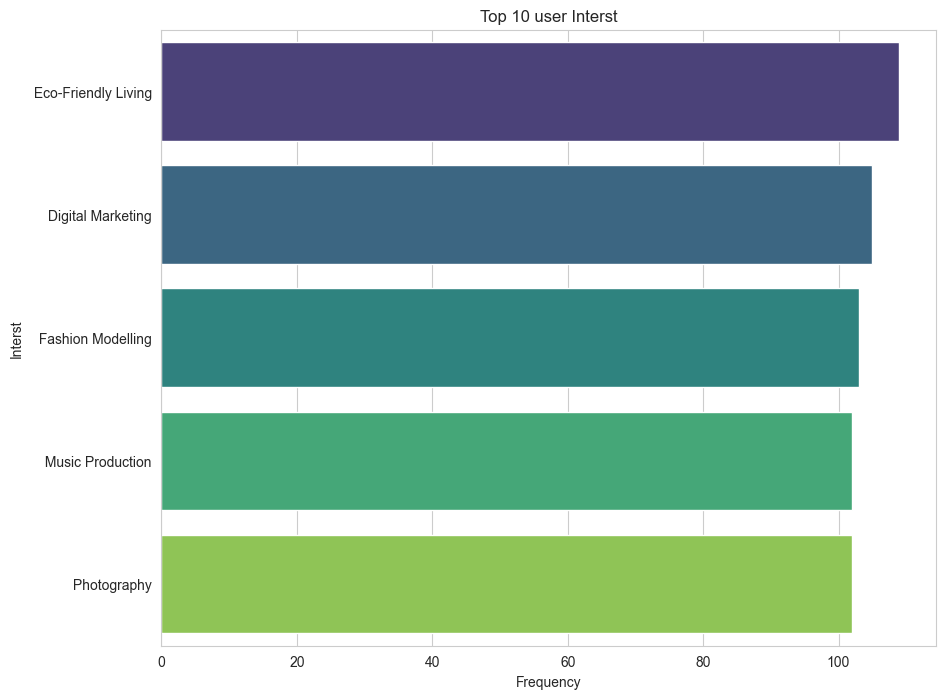

In [154]:
# plotting the most common interests
plt.figure(figsize=(10,8))
sns.barplot(x='Frequency',y='Interest',data=interest_df.head(),palette='viridis')
plt.title('Top 10 user Interst')
plt.xlabel('Frequency')
plt.ylabel('Interst');

In [140]:
df['Top Interests'].value_counts().sort_values(ascending=False)

Top Interests
Investing and Finance                                                                     23
Pet Care                                                                                  18
Gaming                                                                                    18
Digital Marketing                                                                         17
Reading and Literature                                                                    17
                                                                                          ..
Eco-Friendly Living, Photography, Music Production                                         1
Digital Marketing, Reading and Literature, Investing and Finance, Software Engineering     1
Data Science, DIY Crafts                                                                   1
Pet Care, Gardening, Music Production, Software Engineering                                1
Data Science, DIY Crafts, Gaming                        

In [138]:
df.shape

(1000, 16)